# Notebook for Curface Creek Sandstone pmag compilation

## import packages

In [1]:
import numpy as np
import pandas as pd
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 250
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# read in magic tables

Cutface_specimens = pd.read_csv('../data/Pmag/2020_thermal_demag_1/specimens.txt', sep='\t', header=1)
Cutface_sites = pd.read_csv('../data/Pmag/2020_thermal_demag_1/sites.txt', sep='\t', header=1)

display(Cutface_specimens.head())
# display(Cutafce_sites.head())

specimen      experiments sample  dir_alpha95 dir_comp  dir_dec  dir_inc  \
0   CF-10a              NaN  CF-10          NaN      NaN      NaN      NaN   
1   CF-10a  CF-10a_LP-DIR-T  CF-10          NaN       mt    290.1     40.1   
2   CF-10a  CF-10a_LP-DIR-T  CF-10          NaN       lt      3.9     69.6   
3   CF-10a  CF-10a_LP-DIR-T  CF-10          NaN       ht    293.1     28.8   
4   CF-10a  CF-10a_LP-DIR-T  CF-10          NaN       mt    296.2     34.2   

   dir_n_comps  dir_n_measurements  dir_tilt_correction  ...  \
0          NaN                 NaN                  NaN  ...   
1          3.0                 9.0                100.0  ...   
2          3.0                 3.0                  0.0  ...   
3          3.0                 9.0                  0.0  ...   
4          3.0                 9.0                  0.0  ...   

               instrument_codes         software_packages  int_corr  \
0                           NaN                       NaN       NaN   
1  hargrave 2020-11-24 21:43:43  pmagpy-4.2.50: demag_gui         u   
2  hargrave 2020-11-24 21:43:43  pmagpy-4.2.50: demag_gui         u   
3  hargrave 2020-11-24 21:43:43  pmagpy-4.2.50: demag_gui         u   
4  hargrave 2020-11-24 21:43:43  pmagpy-4.2.50: demag_gui         u   

    citations                 method_codes  result_quality volume weight  \
0  This study                     LP-NOMAG             NaN    NaN    NaN   
1  This study  LP-DIR-T:DE-BFL:DA-DIR-TILT               g    NaN    NaN   
2  This study   LP-DIR-T:DE-BFL:DA-DIR-GEO               g    NaN    NaN   
3  This study   LP-DIR-T:DE-BFL:DA-DIR-GEO               g    NaN    NaN   
4  This study   LP-DIR-T:DE-BFL:DA-DIR-GEO               g    NaN    NaN   

        location site  
0  Cutface Creek   CF  
1  Cutface Creek   CF  
2  Cutface Creek   CF  
3  Cutface Creek   CF  
4  Cutface Creek   CF  

[5 rows x 26 columns]

## first plot site mean directions of differnt components

In [3]:
# filter site level data by component and tilt correction
Cutface_sites_lt = Cutface_sites[(Cutface_sites['dir_comp_name']=='lt') & (Cutface_sites['dir_tilt_correction']==100)]
Cutface_sites_mt = Cutface_sites[(Cutface_sites['dir_comp_name']=='mt') & (Cutface_sites['dir_tilt_correction']==100)]
Cutface_sites_ht = Cutface_sites[(Cutface_sites['dir_comp_name']=='ht') & (Cutface_sites['dir_tilt_correction']==100)]

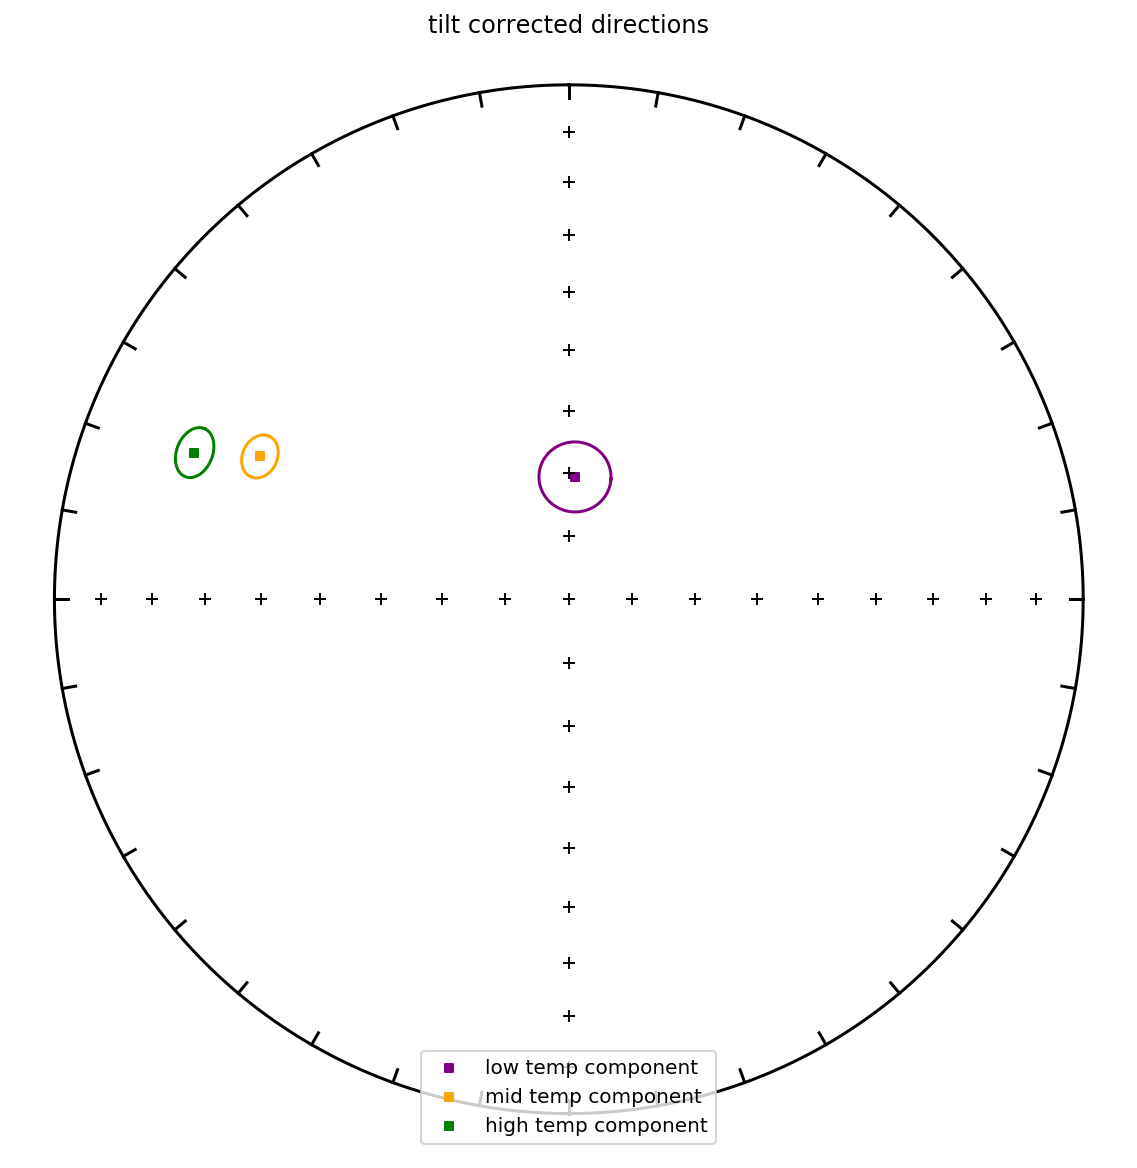

In [4]:
# pre tilt correction site mean directions
fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(Cutface_sites_lt['dir_dec'].tolist()[0],Cutface_sites_lt['dir_inc'].tolist()[0],Cutface_sites_lt['dir_alpha95'].tolist()[0],
                   color='purple', marker = 's', label='low temp component')
ipmag.plot_di_mean(Cutface_sites_mt['dir_dec'].tolist()[0],Cutface_sites_mt['dir_inc'].tolist()[0],Cutface_sites_mt['dir_alpha95'].tolist()[0],
                   color='orange', marker = 's', label='mid temp component')
ipmag.plot_di_mean(Cutface_sites_ht['dir_dec'].tolist()[0],Cutface_sites_ht['dir_inc'].tolist()[0],Cutface_sites_ht['dir_alpha95'].tolist()[0],
                   color='green', marker = 's', label='high temp component')

plt.legend(loc=8)
plt.title('tilt corrected directions')
plt.show()

## second plot specimen directions

In [5]:
Cutface_specimens_lt = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==100)]
Cutface_specimens_mt = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==100)]
Cutface_specimens_ht = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==100)]

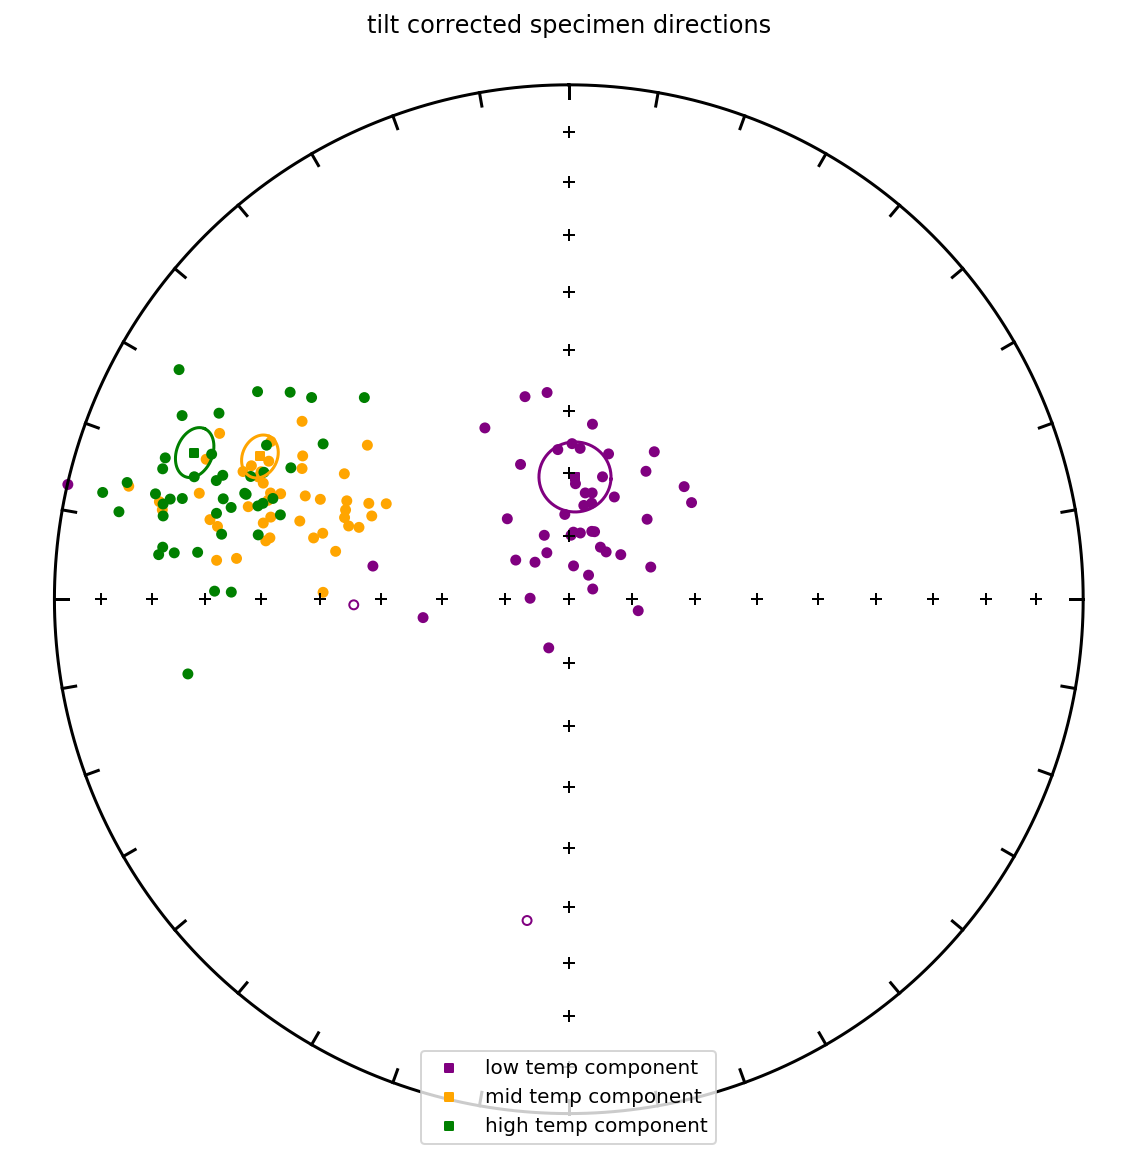

In [6]:
# pre tilt correction site mean directions
fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)

ipmag.plot_di(Cutface_specimens_lt['dir_dec'].tolist(),Cutface_specimens_lt['dir_inc'].tolist(),color='purple')
ipmag.plot_di(Cutface_specimens_mt['dir_dec'].tolist(),Cutface_specimens_mt['dir_inc'].tolist(),color='orange')
ipmag.plot_di(Cutface_specimens_ht['dir_dec'].tolist(),Cutface_specimens_ht['dir_inc'].tolist(),color='green')


ipmag.plot_di_mean(Cutface_sites_lt['dir_dec'].tolist()[0],Cutface_sites_lt['dir_inc'].tolist()[0],Cutface_sites_lt['dir_alpha95'].tolist()[0],
                   color='purple', marker = 's', label='low temp component')
ipmag.plot_di_mean(Cutface_sites_mt['dir_dec'].tolist()[0],Cutface_sites_mt['dir_inc'].tolist()[0],Cutface_sites_mt['dir_alpha95'].tolist()[0],
                   color='orange', marker = 's', label='mid temp component')
ipmag.plot_di_mean(Cutface_sites_ht['dir_dec'].tolist()[0],Cutface_sites_ht['dir_inc'].tolist()[0],Cutface_sites_ht['dir_alpha95'].tolist()[0],
                   color='green', marker = 's', label='high temp component')

plt.legend(loc=8)
plt.title('tilt corrected specimen directions')
plt.show()

## look at the mt and ht components in detail (unsquish by 0.6 ?!)

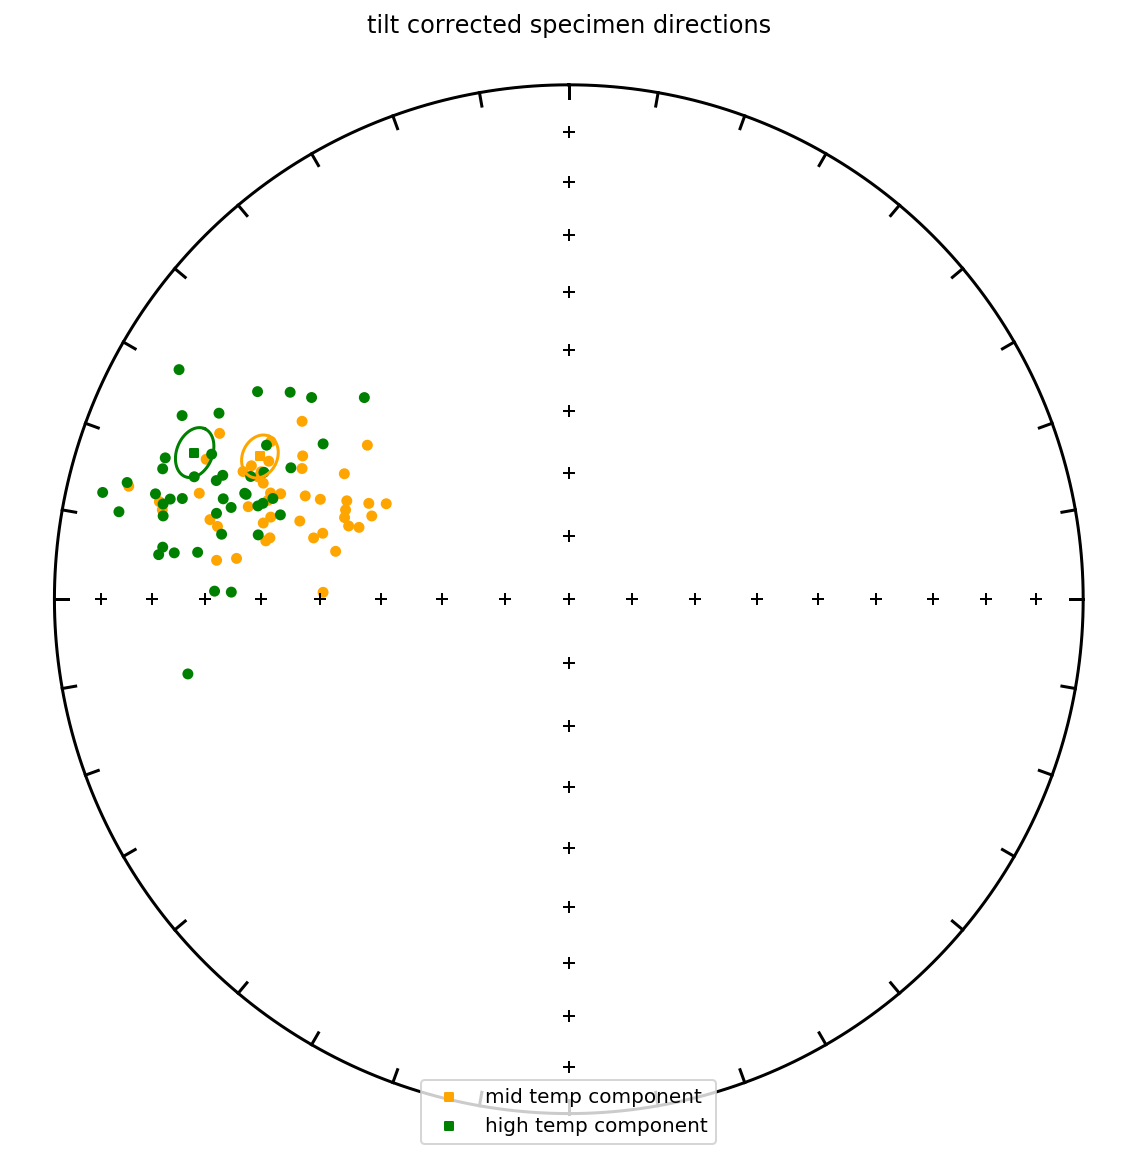

In [7]:
fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)

ipmag.plot_di(Cutface_specimens_mt['dir_dec'].tolist(),Cutface_specimens_mt['dir_inc'].tolist(),color='orange')
ipmag.plot_di(Cutface_specimens_ht['dir_dec'].tolist(),Cutface_specimens_ht['dir_inc'].tolist(),color='green')

ipmag.plot_di_mean(Cutface_sites_mt['dir_dec'].tolist()[0],Cutface_sites_mt['dir_inc'].tolist()[0],Cutface_sites_mt['dir_alpha95'].tolist()[0],
                   color='orange', marker = 's', label='mid temp component')
ipmag.plot_di_mean(Cutface_sites_ht['dir_dec'].tolist()[0],Cutface_sites_ht['dir_inc'].tolist()[0],Cutface_sites_ht['dir_alpha95'].tolist()[0],
                   color='green', marker = 's', label='high temp component')

plt.legend(loc=8)
plt.title('tilt corrected specimen directions')
plt.show()

In [8]:
unsquished_ht_incs = ipmag.unsquish(Cutface_specimens_ht['dir_inc'].tolist(), 0.6)

# calculate mean direction of high temp component after unsquishing
unsquished_ht_mean = ipmag.fisher_mean(dec=Cutface_specimens_ht['dir_dec'].tolist(), inc=unsquished_ht_incs)
unsquished_ht_mean

{'dec': 287.2143449413751,
 'inc': 41.28378023153074,
 'n': 44,
 'r': 42.83288935688149,
 'k': 36.84312216115541,
 'alpha95': 3.5933659607085393,
 'csd': 13.34463826611652}

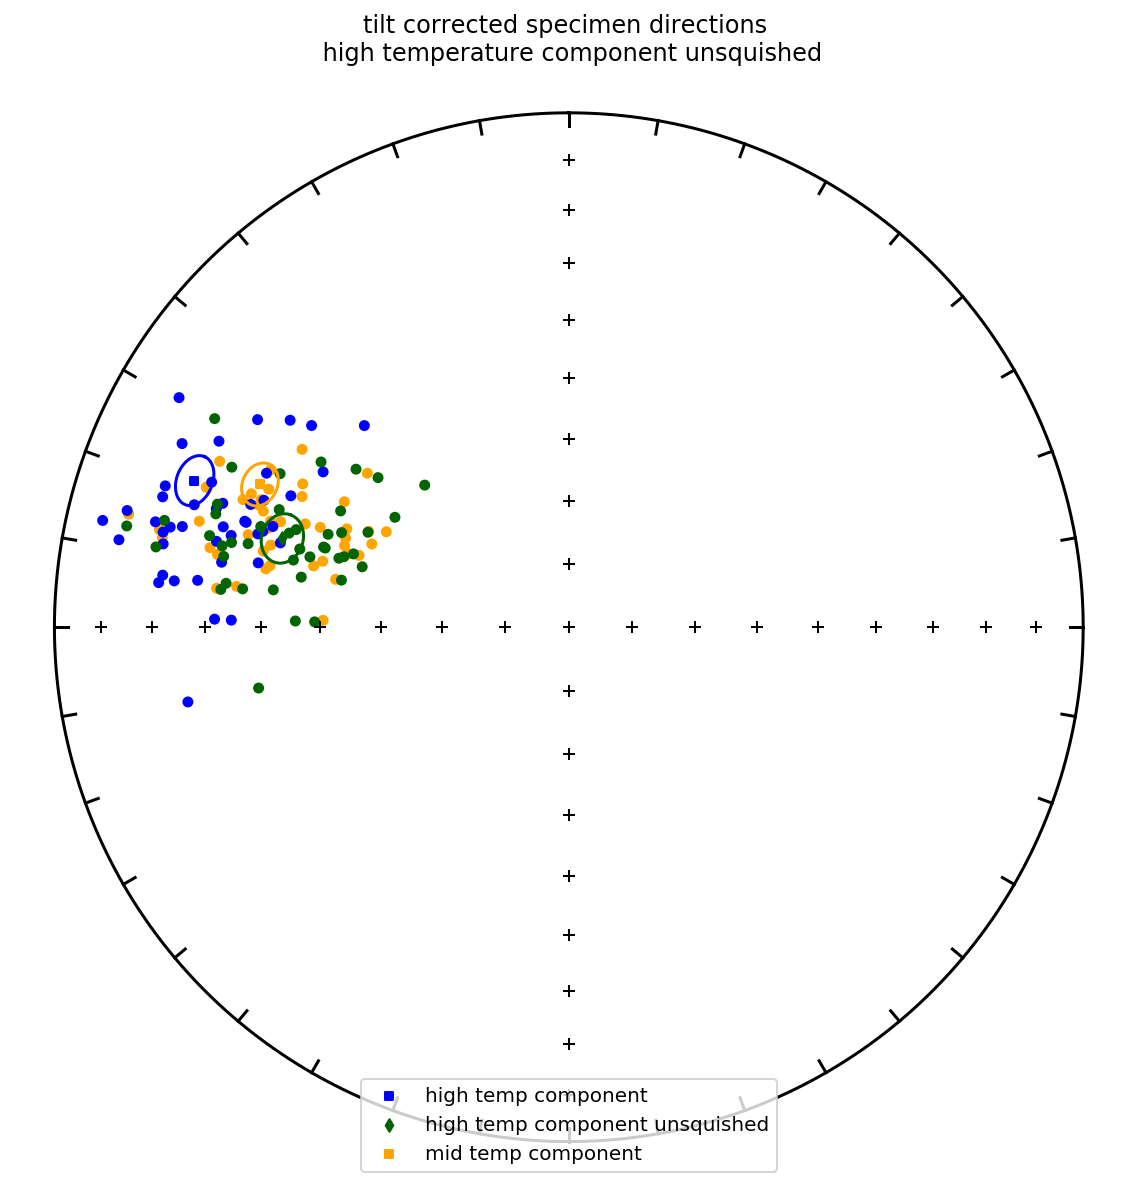

In [9]:
fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)

ipmag.plot_di(Cutface_specimens_mt['dir_dec'].tolist(),Cutface_specimens_mt['dir_inc'].tolist(),color='orange')
ipmag.plot_di(Cutface_specimens_ht['dir_dec'].tolist(),Cutface_specimens_ht['dir_inc'].tolist(),color='blue')
ipmag.plot_di(Cutface_specimens_ht['dir_dec'].tolist(),unsquished_ht_incs,color='darkgreen')


ipmag.plot_di_mean(Cutface_sites_ht['dir_dec'].tolist()[0],Cutface_sites_ht['dir_inc'].tolist()[0],Cutface_sites_ht['dir_alpha95'].tolist()[0],
                   color='blue', marker = 's', label='high temp component')
ipmag.plot_di_mean(unsquished_ht_mean['dec'],unsquished_ht_mean['inc'],unsquished_ht_mean['alpha95'],
                   color='darkgreen', marker = 'd', label='high temp component unsquished')
ipmag.plot_di_mean(Cutface_sites_mt['dir_dec'].tolist()[0],Cutface_sites_mt['dir_inc'].tolist()[0],Cutface_sites_mt['dir_alpha95'].tolist()[0],
                   color='orange', marker = 's', label='mid temp component')

plt.legend(loc=8)
plt.title('tilt corrected specimen directions \n high temperature component unsquished')
plt.show()

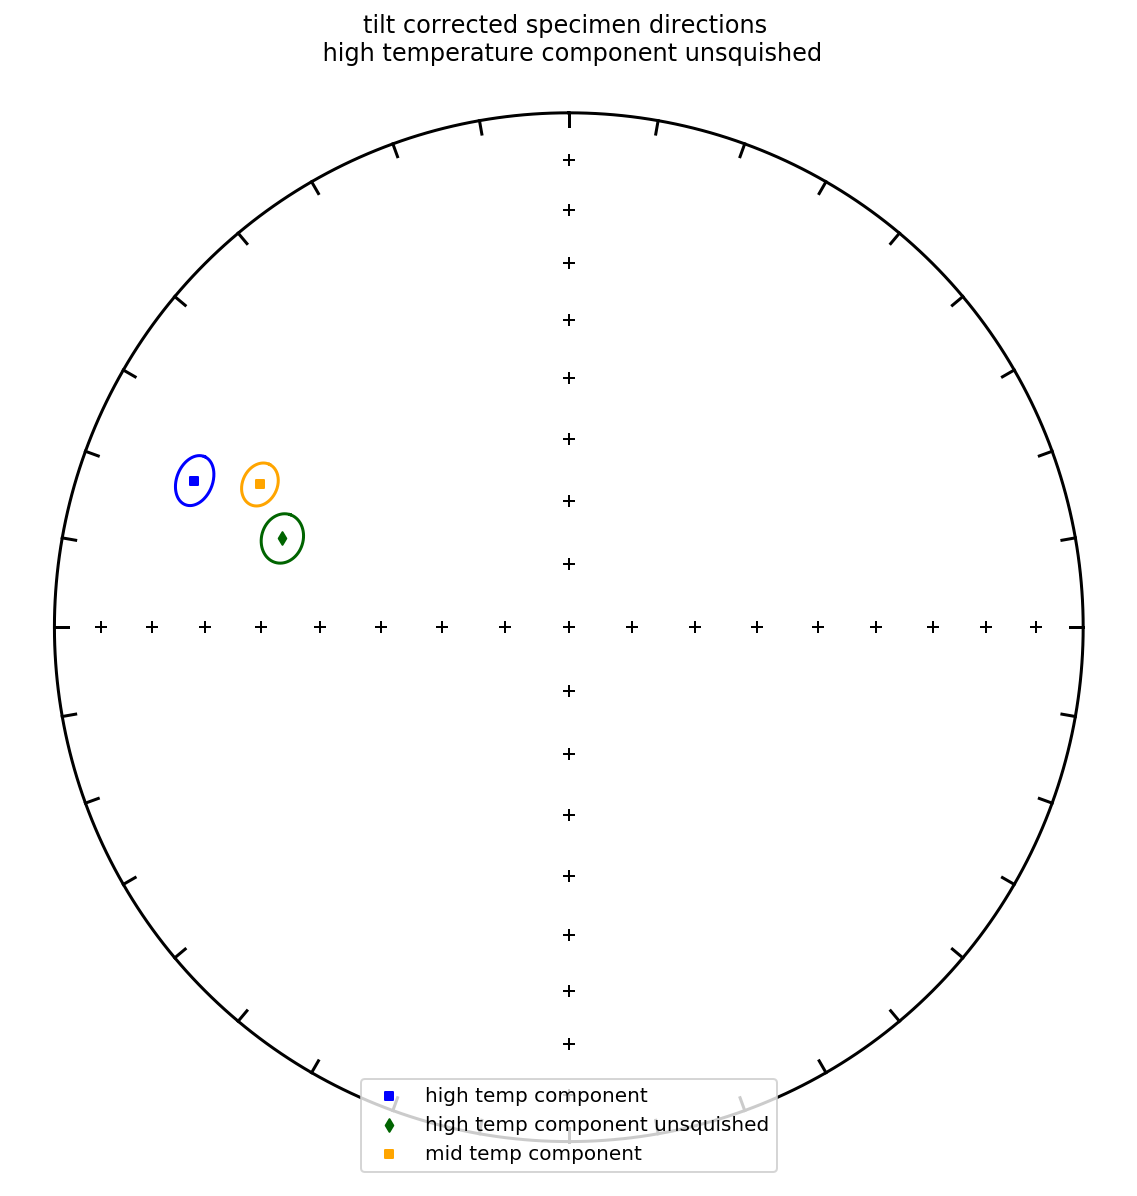

In [10]:
fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(Cutface_sites_ht['dir_dec'].tolist()[0],Cutface_sites_ht['dir_inc'].tolist()[0],Cutface_sites_ht['dir_alpha95'].tolist()[0],
                   color='blue', marker = 's', label='high temp component')
ipmag.plot_di_mean(unsquished_ht_mean['dec'],unsquished_ht_mean['inc'],unsquished_ht_mean['alpha95'],
                   color='darkgreen', marker = 'd', label='high temp component unsquished')
ipmag.plot_di_mean(Cutface_sites_mt['dir_dec'].tolist()[0],Cutface_sites_mt['dir_inc'].tolist()[0],Cutface_sites_mt['dir_alpha95'].tolist()[0],
                   color='orange', marker = 's', label='mid temp component')

plt.legend(loc=8)
plt.title('tilt corrected specimen directions \n high temperature component unsquished')
plt.show()

## let's try different unsquishing factors

In [11]:
def unsquish_factors(decs, incs, n=5):
    # this function explores different unsquishing factors upon CF ht directions
    fignum = 1
    plt.figure(num=fignum,figsize=(8,8))
    ipmag.plot_net(fignum)
    factors = np.linspace(0.1,1, num=n)
    
    undquished_mean_list = [] 
    for i in range(len(factors)):
        unsquished_incs = ipmag.unsquish(incs , factors[i])
        unsquished_mean = ipmag.fisher_mean(decs, unsquished_incs)
        undquished_mean_list.append(unsquished_mean)
        ipmag.plot_di_mean(unsquished_mean['dec'],unsquished_mean['inc'],unsquished_mean['alpha95'],
                   color='C'+str(i), marker = 'd', label='high temp component unsquished with factor '+str(round(factors[i], 1)))
    plt.legend(loc=8)
    return undquished_mean_list
# calculate mean direction of high temp component after unsquishing


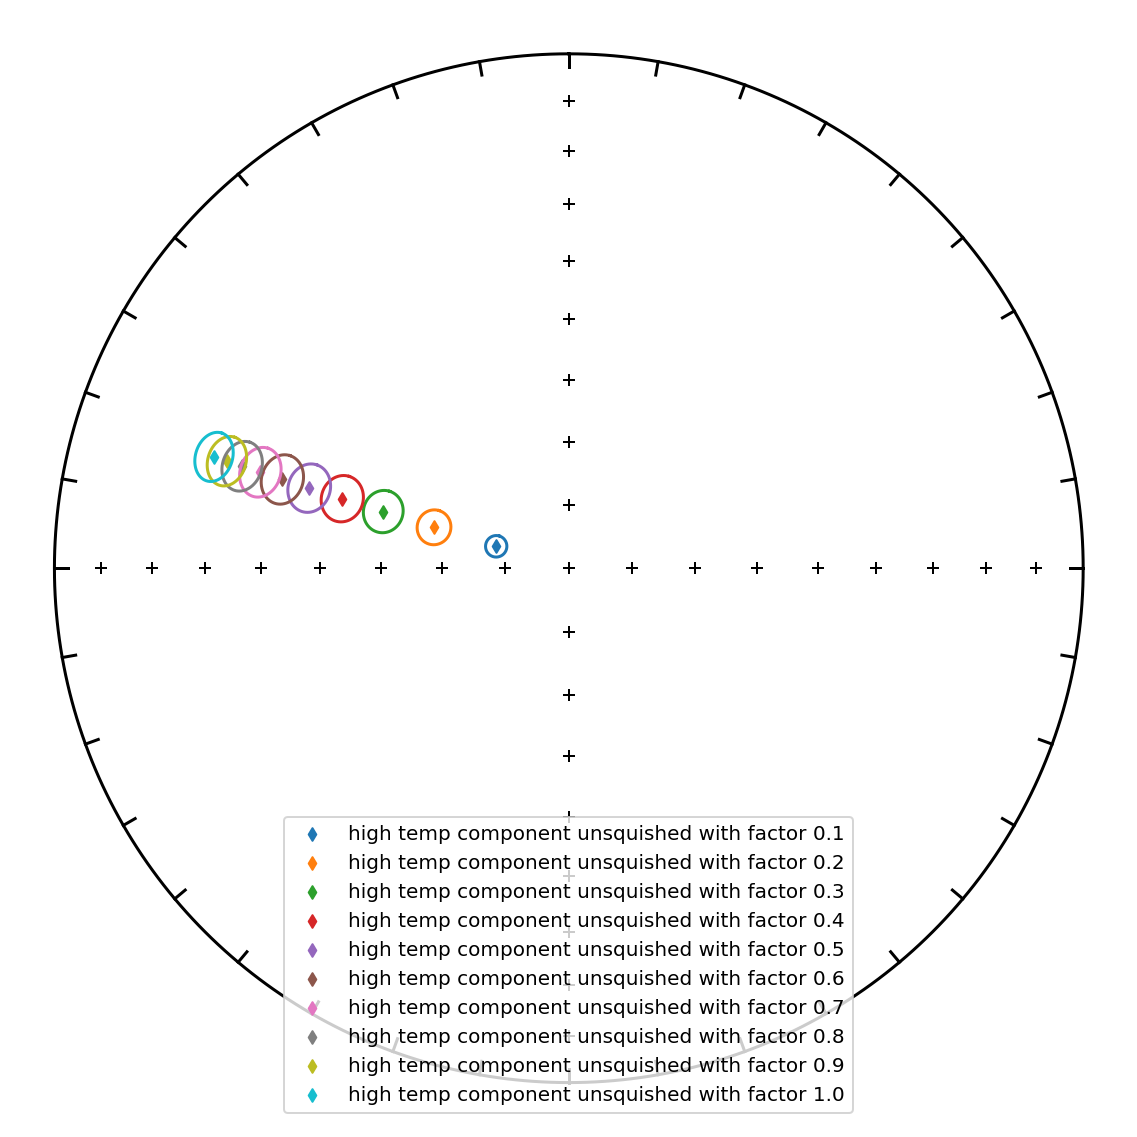

In [12]:
CF_undquished_mean_list = unsquish_factors(Cutface_specimens_ht['dir_dec'].tolist(), Cutface_specimens_ht['dir_inc'].tolist(), n=10) 

In [13]:
CF_undquished_mean_list[:5]

[{'dec': 286.7833029370632,
  'inc': 78.03300327130569,
  'n': 44,
  'r': 43.7367142994293,
  'k': 163.32068132372245,
  'alpha95': 1.6887650118370579,
  'csd': 6.3381779375837395},
 {'dec': 286.87862162389274,
  'inc': 67.6648695330771,
  'n': 44,
  'r': 43.33095872399767,
  'k': 64.27107196873473,
  'alpha95': 2.704771468690297,
  'csd': 10.103625658069598},
 {'dec': 286.9702407852441,
  'inc': 59.053379210471775,
  'n': 44,
  'r': 43.05075224330415,
  'k': 45.29902725256356,
  'alpha95': 3.232361715900669,
  'csd': 12.034847205029479},
 {'dec': 287.05853288149643,
  'inc': 51.963832336469586,
  'n': 44,
  'r': 42.901759619517996,
  'k': 39.15354121392608,
  'alpha95': 3.4828996583083014,
  'csd': 12.944923703227534},
 {'dec': 287.1407818020291,
  'inc': 46.12249531853483,
  'n': 44,
  'r': 42.84148203274418,
  'k': 37.11638594768979,
  'alpha95': 3.5797502307229285,
  'csd': 13.295423572815995}]

## plot everything as poles

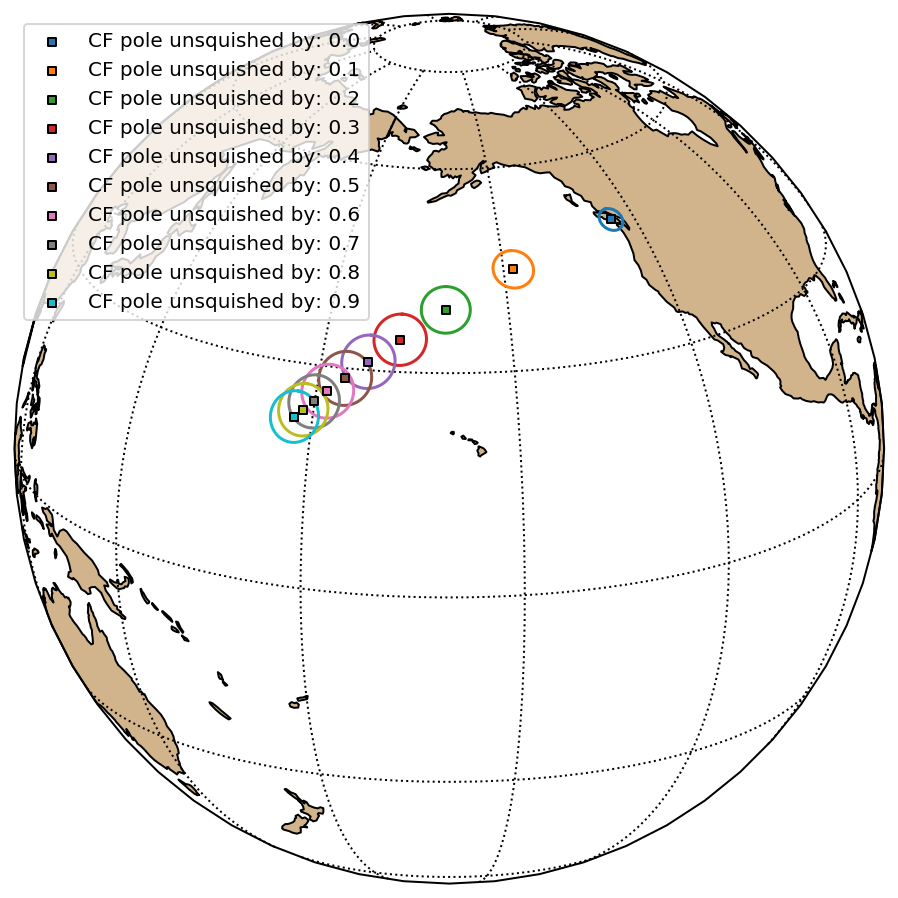

In [14]:
NSVG_NE_plon = 181.7
NSVG_NE_plat = 31.1

CF_lat = 47.7
CF_lon = -90.44

    
# plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)

# ipmag.plot_pole(map_axis,188,28,2.5,label='Schroeder Lutsen Basalts', marker='s',color='Blue')
# ipmag.plot_pole(map_axis,182,31,4.2,label='North Shore Volcanic Group (upper NE)',marker='s',color='Red')

for i, mean_dir in enumerate(CF_undquished_mean_list):
    plon, plat, dp, dm = pmag.dia_vgp(mean_dir['dec'], mean_dir['inc'], mean_dir['alpha95'], CF_lat, CF_lon)
    
    ipmag.plot_pole(map_axis,plon,plat, mean_dir['alpha95'],label='CF pole unsquished by: '+ str(i/len(CF_undquished_mean_list)),
               marker='s',color='C'+str(i))

plt.legend()
plt.show()